In [1]:
# Import Python Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Python Package for Scikit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\sehja\Downloads\Untitled Folder\archive_2\Expanded_data_with_more_features.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [4]:
df.drop(['Id'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [6]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-Oct,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-Oct,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-Oct,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5-Oct,59,61,65
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5-Oct,58,53,51
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5-Oct,61,70,67
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5-Oct,82,90,93


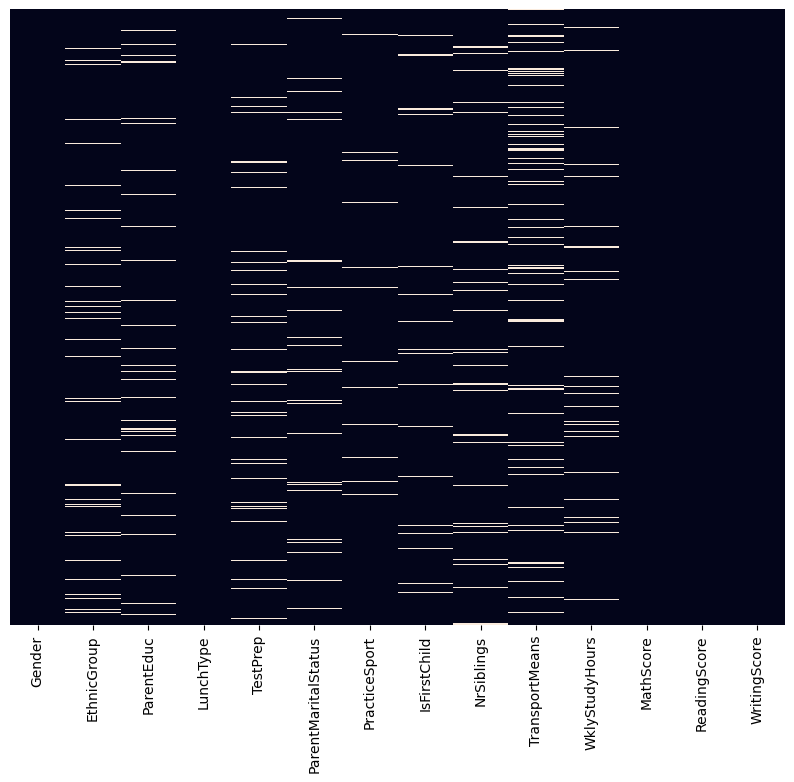

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8)) # Set the figure size
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, ax=ax) # Use the `ax` parameter to specify the subplot
plt.show() # Show the plot

C:\Users\sehja\AppData\Local\Temp\ipykernel_10428\2674070531.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


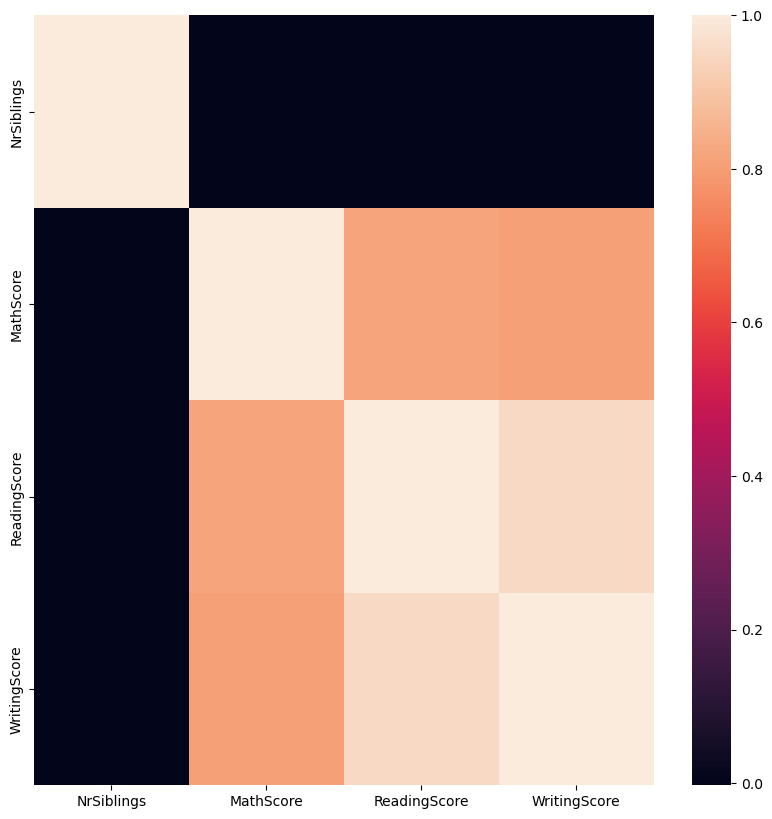

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix)
plt.show()


In [9]:
df['average_score'] = (df['MathScore'] + df['ReadingScore'] + df['WritingScore']) / 3
df['average_score'] = df['average_score'].astype(int)
df['average_score'] = round(df['average_score']).astype(int)


In [10]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,average_score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5-Oct,69,90,88,82
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5-Oct,45,56,42,47
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-Oct,76,78,75,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5-Oct,59,61,65,61
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5-Oct,58,53,51,54
30638,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5-Oct,61,70,67,66
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5-Oct,82,90,93,88


In [11]:
print(df['ParentEduc'].value_counts().sort_index())

result = df.groupby('ParentEduc')['average_score'].mean()

# print the result
print(result)

associate's degree    5550
bachelor's degree     3386
high school           5687
master's degree       2023
some college          6633
some high school      5517
Name: ParentEduc, dtype: int64
ParentEduc
associate's degree    69.597297
bachelor's degree     71.953042
high school           65.358185
master's degree       74.516065
some college          67.696216
some high school      63.579300
Name: average_score, dtype: float64


In [12]:
# The highest number of parents have completed high school, followed by some college, and then some high school.
# The highest average score is achieved by those with a master's degree, followed by bachelor's degree, then associate's degree.
# On average, parents with a master's degree have children with the highest average score, while those with some high school 
# education have children with the lowest average score.

In [13]:
print(df['WklyStudyHours'].value_counts().sort_index())

result2 = df.groupby('WklyStudyHours')['average_score'].mean()

print(result2)

5-Oct    16246
< 5       8238
> 10      5202
Name: WklyStudyHours, dtype: int64
WklyStudyHours
5-Oct    68.059892
< 5      66.283564
> 10     69.286044
Name: average_score, dtype: float64


In [14]:
# There is not a significant difference in average scores between students who study
# 5 hours and those who study more than 10 hours per week.

In [15]:
print(df['PracticeSport'].value_counts().sort_index())

result2 = df.groupby('PracticeSport')['average_score'].mean()

print(result2)

never         4004
regularly    10793
sometimes    15213
Name: PracticeSport, dtype: int64
PracticeSport
never        66.010490
regularly    68.800889
sometimes    67.532045
Name: average_score, dtype: float64


In [17]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# for col in ['Gender', 'EthnicGroup', 'ParentEduc','LunchType','TestPrep','ParentMaritalStatus','PracticeSport','IsFirstChild','TransportMeans','WklyStudyHours']:
#     df[col] = le.fit_transform(df[col])

# # reset the index
# df = df.reset_index(drop=True)


In [18]:
df

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,average_score
0,0,5,1,1,1,1,1,1,3.0,1,1,71,71,74,72
1,0,2,4,1,2,1,2,1,0.0,2,0,69,90,88,82
2,0,1,3,1,1,2,2,1,4.0,1,1,87,93,91,90
3,1,0,0,0,1,1,0,0,1.0,2,0,45,56,42,47
4,1,2,4,1,1,1,2,1,0.0,1,0,76,78,75,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,0,3,2,1,1,2,2,0,2.0,1,0,59,61,65,61
30637,1,4,2,1,1,2,1,0,1.0,0,0,58,53,51,54
30638,0,5,2,0,0,1,2,0,1.0,0,0,61,70,67,66
30639,0,3,0,1,0,1,1,0,3.0,1,0,82,90,93,88


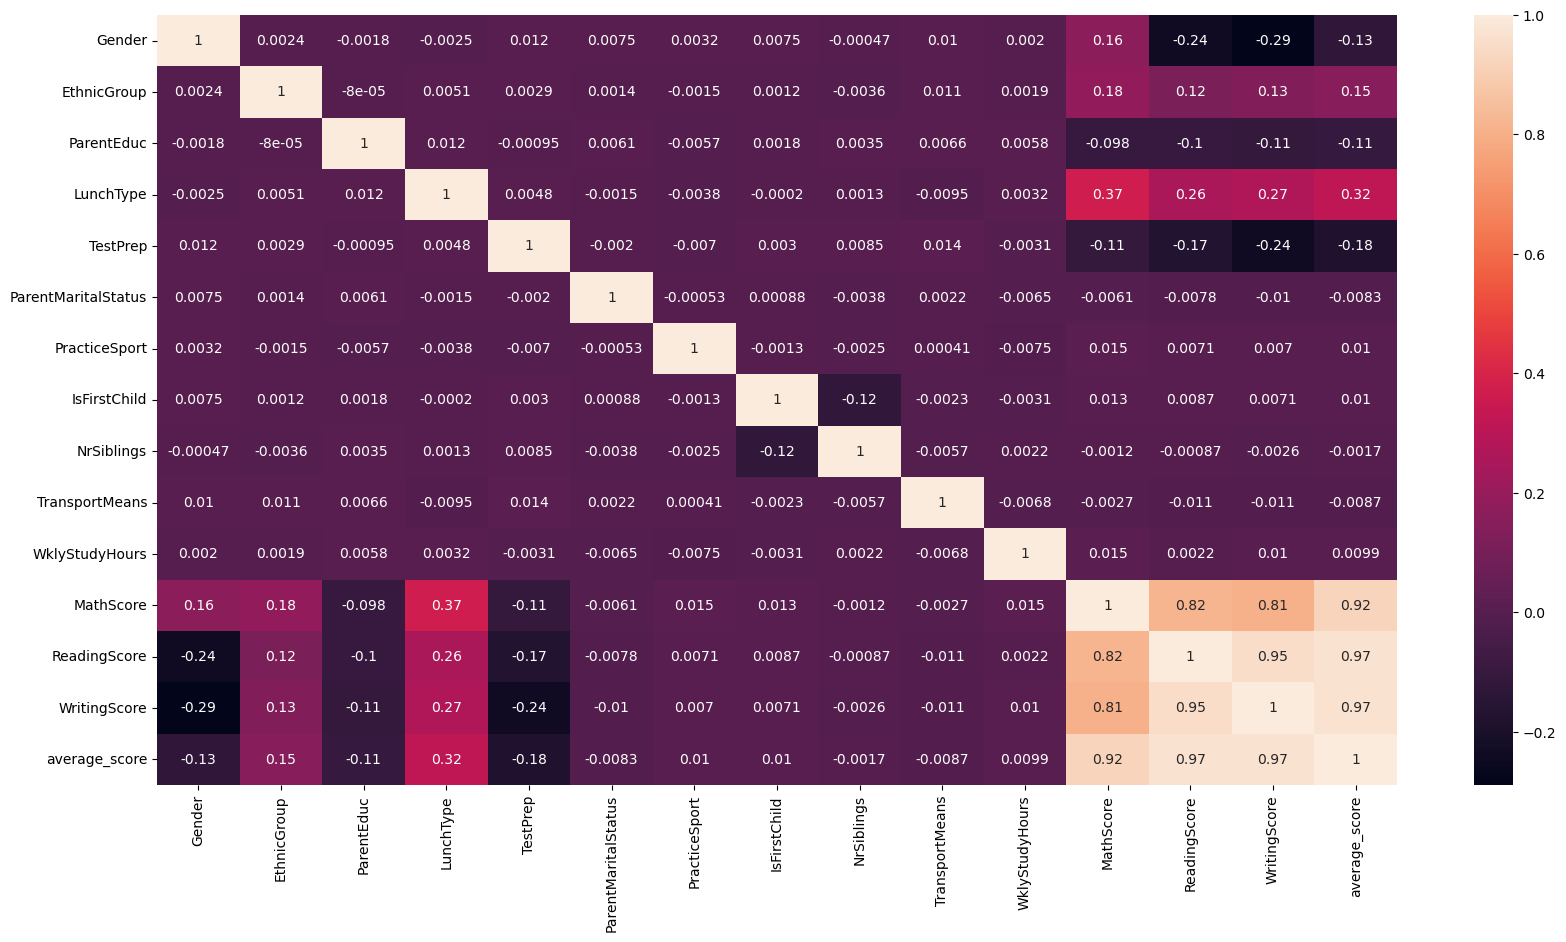

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()


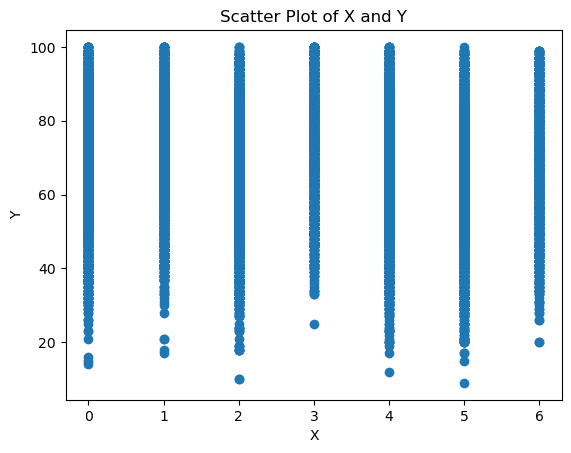

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = df["ParentEduc"]
y = df["average_score"]

# Create a scatter plot
plt.scatter(x, y)
plt.title('Scatter Plot of X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


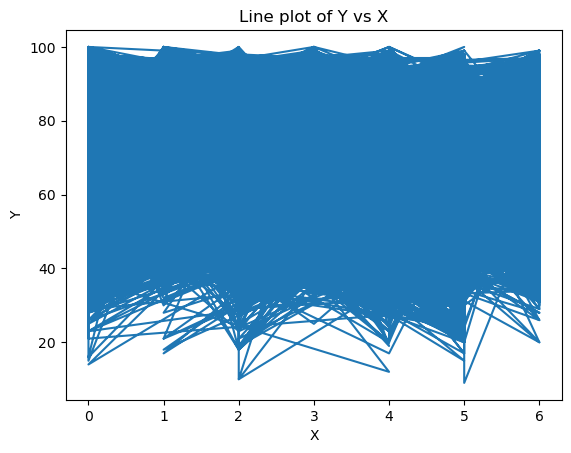

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = df["ParentEduc"]
y = df["average_score"]

# Create a line plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line plot of Y vs X')

# Show the plot
plt.show()


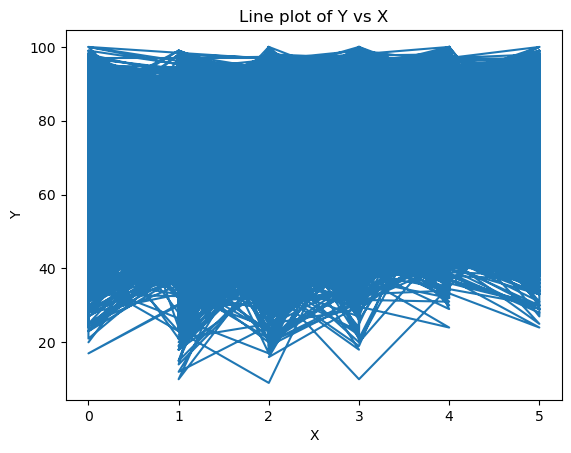

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = df["EthnicGroup"]
y = df["average_score"]

# Create a line plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line plot of Y vs X')

# Show the plot
plt.show()


In [23]:
X=df[["ReadingScore","LunchType"]]
y = df["average_score"]


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an instance of the LinearRegression model
lr = LinearRegression()

# Fitting the model on the training data
lr.fit(X_train, y_train)

# Predicting the target values for the testing data
y_pred = lr.predict(X_test)

# Calculating the R-squared score for the model
r2 = r2_score(y_test, y_pred)

# Printing the R-squared score
print("R-squared:", r2)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R-squared: 0.9440080188555596
Mean Squared Error: 11.553731542874873
Root Mean Squared Error: 3.3990780430691605


In [25]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Fit the model
model = BayesianRidge()
model.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred1 = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred1, squared=False)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.9440075876235001
Mean Squared Error: 11.553820525963987
Root Mean Squared Error: 3.399091132341701


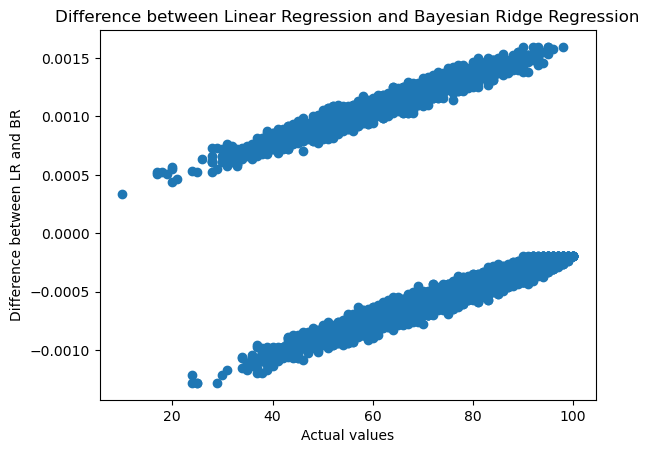

In [26]:
# plot the predicted values against the actual values
plt.scatter(y_test, y_pred1 - y_pred)
plt.xlabel('Actual values')
plt.ylabel('Difference between LR and BR')
plt.title('Difference between Linear Regression and Bayesian Ridge Regression')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the math scores on the test set
y_pred2 = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


R-squared: 0.943777150198816
Mean Squared Error: 11.601370408783167
Root Mean Squared Error: 3.4060784501803782


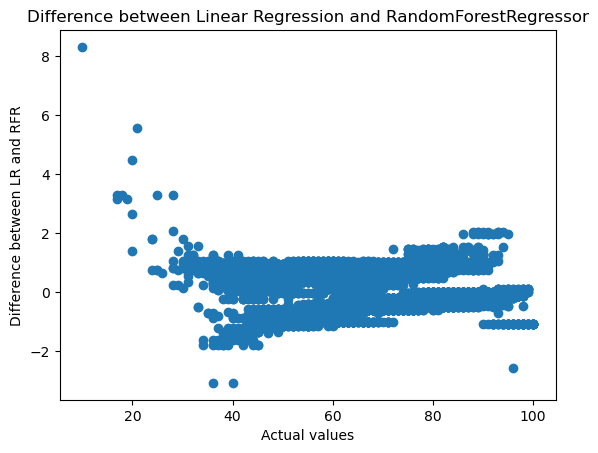

In [45]:
# plot the predicted values against the actual values
plt.scatter(y_test, y_pred - y_pred2)
plt.xlabel('Actual values')
plt.ylabel('Difference between LR and RFR')
plt.title('Difference between Linear Regression and RandomForestRegressor')
plt.show()

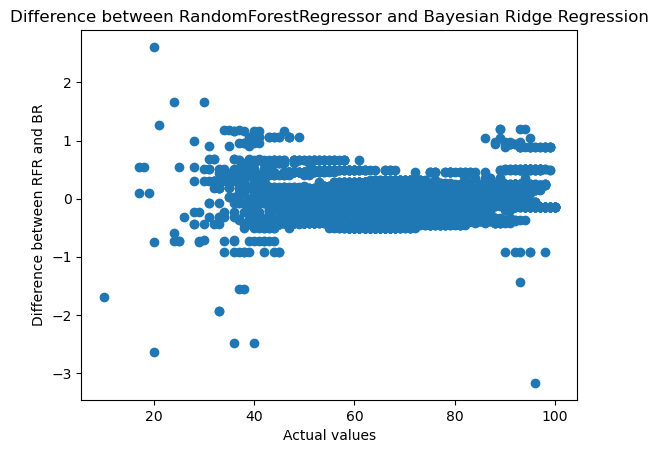

In [44]:
# plot the predicted values against the actual values
plt.scatter(y_test, y_pred1 - y_pred2)
plt.xlabel('Actual values')
plt.ylabel('Difference between RFR and BR')
plt.title('Difference between RandomForestRegressor and Bayesian Ridge Regression')
plt.show()

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# create the SVR model and fit the data
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

# make predictions on the test data
y_pred3 = regressor.predict(X_test)

# evaluate the model performance
r2 = r2_score(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = mean_squared_error(y_test, y_pred3, squared=False)

# print the results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


R-squared: 0.9420980495786511
Mean Squared Error: 11.947846411281006
Root Mean Squared Error: 3.456565696074791


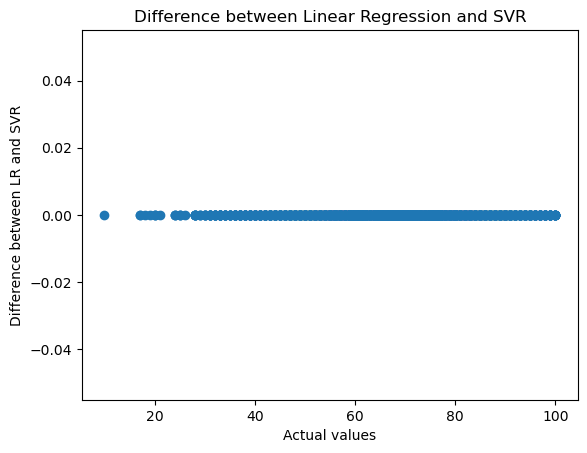

In [43]:
# plot the predicted values against the actual values
plt.scatter(y_test, y_pred - y_pred3)
plt.xlabel('Actual values')
plt.ylabel('Difference between LR and SVR')
plt.title('Difference between Linear Regression and SVR')
plt.show()

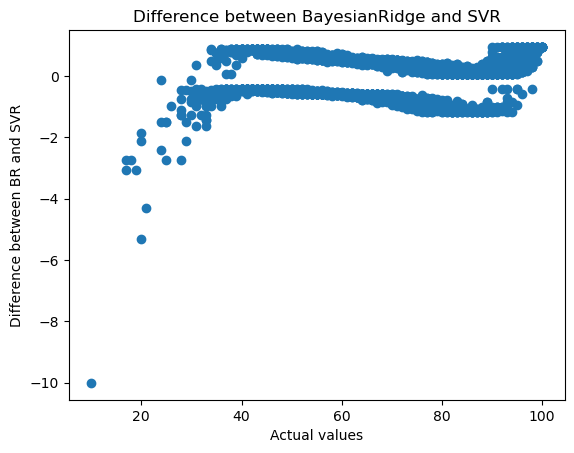

In [42]:
# plot the predicted values against the actual values
plt.scatter(y_test, y_pred1 - y_pred3)
plt.xlabel('Actual values')
plt.ylabel('Difference between BR and SVR')
plt.title('Difference between BayesianRidge and SVR')
plt.show()

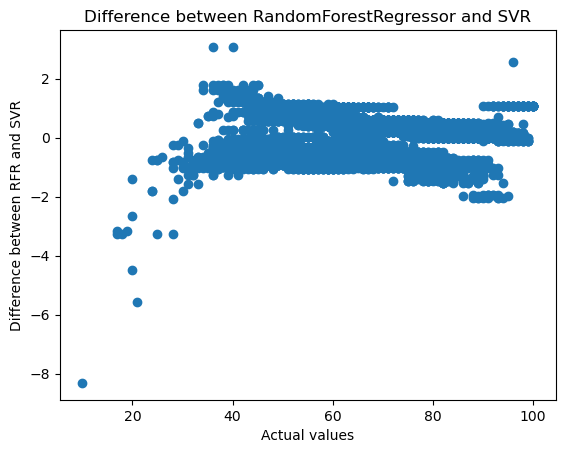

In [41]:
# plot the predicted values against the actual values
plt.scatter(y_test, y_pred2 - y_pred3)
plt.xlabel('Actual values')
plt.ylabel('Difference between RFR and SVR')
plt.title('Difference between RandomForestRegressor and SVR')
plt.show()